In [1]:
import matlab.engine
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
eng = matlab.engine.start_matlab()
import cmasher as cmr
choice_cmap='viridis'
hist_color='purple'
import matplotlib.ticker as mticker
import os
import pandas as pd


eng.addpath(eng.genpath('~/Desktop/Belgio'))
eng.addpath(eng.genpath('~/Desktop/Snag'))
eng.addpath(eng.genpath('~/Desktop/ET/'))

savedir='/Users/andrewmiller/Desktop/Belgio/dark_matter/GeV_excess/figures/python_plots/'

In [273]:
tabella=pd.read_csv("./data/skymap.csv",delimiter=",")

In [274]:
lons=np.array(tabella["matrix1"])
lats=np.array(tabella["matrix2"])
values=np.array(tabella["matrix3"])
ellips=np.array(tabella["matrix4"])

unique_lons=np.unique(lons)
unique_lats=np.unique(lats)



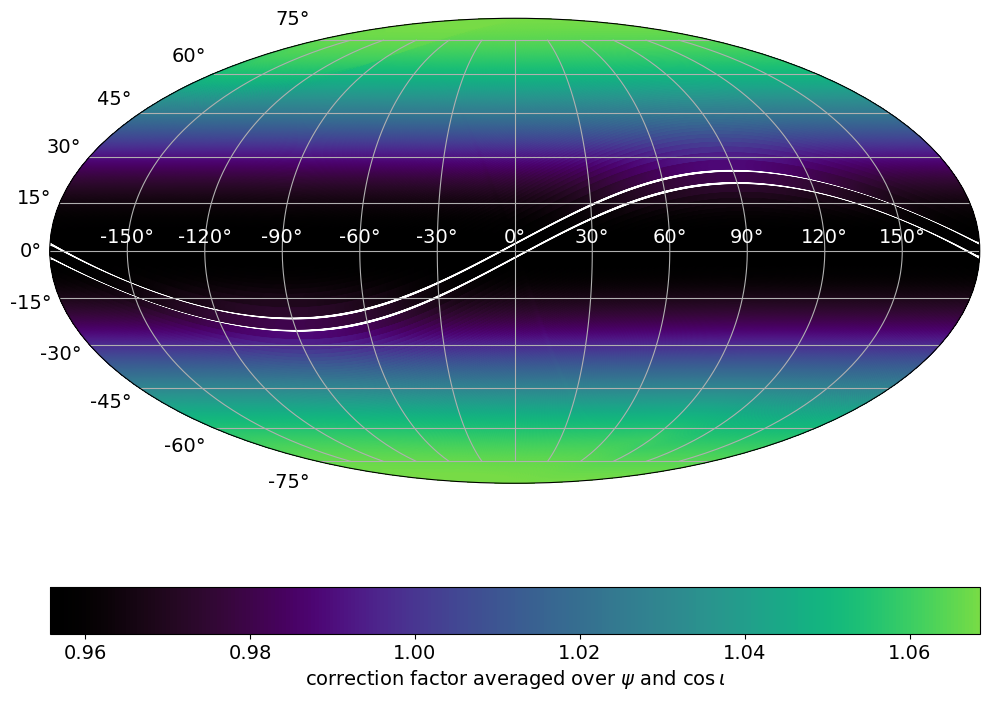

In [275]:
# for i in range(len(lons)):
#     if lons[i]>180:
#         lons[i] -= 360

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='x', colors='white',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
sc = ax.scatter(lons*np.pi/180, lats*np.pi/180, c=values,cmap='cmr.lavender')
cbar=plt.colorbar(sc,label=r'correction factor averaged over $\psi$ and $\cos \iota$',orientation="horizontal")
cbar.set_label(label='correction factor averaged over $\psi$ and $\cos \iota$',size=14)
cbar.ax.tick_params(labelsize=14)
# plt.savefig(savedir+'skymap.png',format='png',dpi=400,facecolor='w')

In [276]:
# # for i in range(len(lons)):
# #     if lons[i]>180:
# #         lons[i] -= 360

# fig = plt.figure(figsize=(12,9))
# ax = fig.add_subplot(111, projection="mollweide")
# ax.grid(True)

# ax.tick_params(axis='x', colors='white',labelsize=14)
# ax.tick_params(axis='y',labelsize=14)

# sc = ax.scatter(lons*np.pi/180, lats*np.pi/180, c=ellips,cmap='magma')
# cbar=plt.colorbar(sc,orientation="horizontal")
# cbar.set_label(label='sky-dependent ellipticities',size=14)
# cbar.ax.tick_params(labelsize=14)
# plt.savefig(savedir+'ellip_skymap.png',format='png',dpi=400,facecolor='w')

In [16]:
## figure 2, left


which_dist='magnetic'
which_run='O3allsky'
dist_kpc=8.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag, nargout=18)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


In [39]:
ellip_kde

array([[3.37899696e-11, 3.38336426e-11, 3.38773721e-11, ...,
        2.74566795e-04, 2.74921668e-04, 2.75277000e-04]])

In [38]:
log_ellip_dist=np.array(log_ellip_dist)
log_f_dist=np.array(log_f_dist)
ellip_kde=np.array(ellip_kde)
ellip_pdf=np.array(ellip_pdf)
f_kde=np.array(f_kde)
f_pdf=np.array(f_pdf)

In [40]:
freq_dist_kde={'frequencies': np.squeeze(f_kde), 'pdf': np.squeeze(f_pdf)}
freq_dist_kde_DF=pd.DataFrame(freq_dist_kde)
ellip_magenetic_DF.to_csv('~/Downloads/freq_dist_kde.csv',index = False)

In [41]:
freq_distt={'log10 frequencies': np.squeeze(log_f_dist)}
freq_distt_DF=pd.DataFrame(freq_distt)
freq_distt_DF.to_csv('~/Downloads/log10_freq_dist.csv',index = False)

In [42]:
ellip_magnetic={'log10 ellipticity': np.squeeze(log_ellip_dist)}
ellip_magenetic_DF=pd.DataFrame(ellip_magnetic)
ellip_magenetic_DF.to_csv('~/Downloads/log10_ellip_magnetic.csv',index = False)

In [43]:
ellip_magnetic_kde={'ellipticities': np.squeeze(ellip_kde), 'pdf': np.squeeze(ellip_pdf)}
ellip_magnetic_kde_DF=pd.DataFrame(ellip_magnetic_kde)
ellip_magenetic_DF.to_csv('~/Downloads/ellip_dist_kde.csv',index = False)

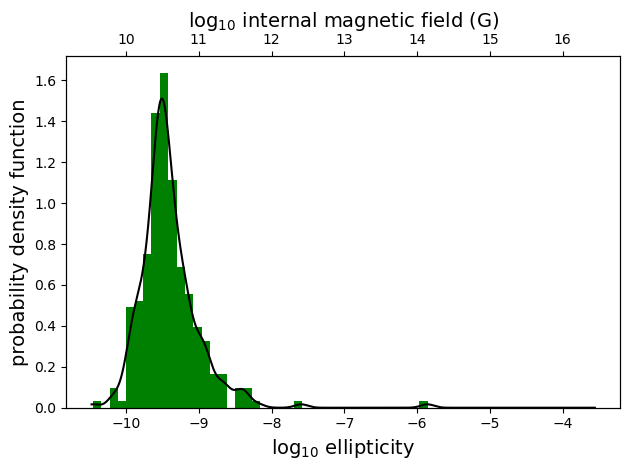

In [4]:
fig,ax1=plt.subplots()
plt.hist(np.squeeze(log_ellip_dist),40,color="green",density=True); 

B_from_ellip=np.log10(1e8*(ellip_kde*1e12))

plt.plot(np.log10(ellip_kde.transpose()),ellip_pdf,'k')#,'LineWidth',2);
plt.ylabel(r'probability density function',size=14)
plt.xlabel(r'$\log_{10}$ ellipticity',size=14)

ax2 = ax1.twiny()
ax2.plot(B_from_ellip.transpose(), ellip_pdf, color='black',linewidth=0)
ax2.set_xlabel(r'$\log_{10}$ internal magnetic field (G)',size=14)

# plt.xlim([1e7,5e1])
plt.tight_layout()
plt.savefig(savedir+'allsky_pdf_ellip_dist_magnetic_case.png',format='png',dpi=400,facecolor='w')

In [334]:
L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)
np.max(Ngw)

3.654129379873126

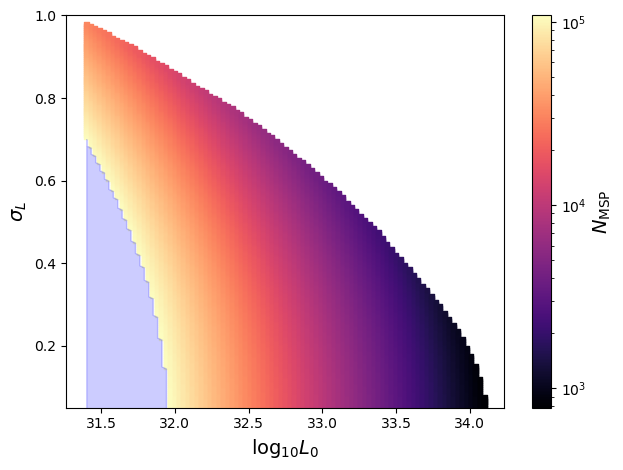

In [335]:
## figure 2, left

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))


for i in range(len(sigmaLs_exc_unique)):
#     if i==len(L0s_exc_unique)-1:
#          maxsigmaL[i]=np.min(sigmaLs_exc[L0s_exc_unique[i]==L0s_exc])
#     else:
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
# plt.xscale('log')
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
# plt.axhline(y = np.max(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.axhline(y = np.min(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.plot(maxL0,sigmaLs_exc_unique,'-',markersize=1)
# ax1.fill_between(L0[Ngw>=N], sigmaL[Ngw>=N], (max_eps*1e-20)**2,color='cyan',label=r'BSD limits $\pm1\sigma$',zorder=2)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)
# plt.plot(L0[Ngw>=N], sigmaL[Ngw>=N],color='gray',linewidth=4)#,alpha=0.3,marker='s',s=40)#,marker='s',s=100,color='blue',alpha=0.1)

# plt.grid(True)
# plt.xlim([1e7,5e1])
plt.tight_layout()
plt.savefig(savedir+'all_sky_conserv_model_exclusion_region_plot.png',format='png',dpi=400,facecolor='w')


In [15]:
## figure 2, right


which_dist='magnetic'
which_run='O3'
dist_kpc=8.0
prop_factor=150.0
Izz=5.0e38
plot_flag=0

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag, nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)
np.max(Ngw)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


228.9882285224749

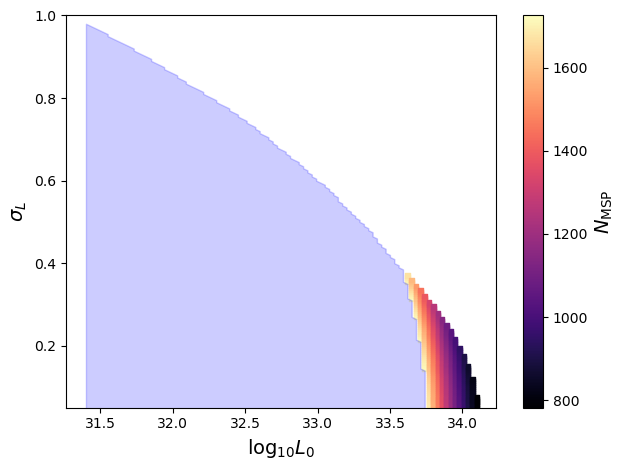

In [312]:
## figure 2, right


N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))


for i in range(len(sigmaLs_exc_unique)):
#     if i==len(L0s_exc_unique)-1:
#          maxsigmaL[i]=np.min(sigmaLs_exc[L0s_exc_unique[i]==L0s_exc])
#     else:
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10)#,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
# plt.xscale('log')
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
# plt.axhline(y = np.max(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.axhline(y = np.min(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.plot(maxL0,sigmaLs_exc_unique,'-',markersize=1)
# ax1.fill_between(L0[Ngw>=N], sigmaL[Ngw>=N], (max_eps*1e-20)**2,color='cyan',label=r'BSD limits $\pm1\sigma$',zorder=2)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)
# plt.plot(L0[Ngw>=N], sigmaL[Ngw>=N],color='gray',linewidth=4)#,alpha=0.3,marker='s',s=40)#,marker='s',s=100,color='blue',alpha=0.1)

# plt.grid(True)
# plt.xlim([1e7,5e1])
plt.tight_layout()
plt.savefig(savedir+'allsky_conserv_Izz_5e38_model_exclusion_region_plot.png',format='png',dpi=400,facecolor='w')

In [297]:
ff=np.array(ff)
num_detectable_MSPs=np.array(num_detectable_MSPs)
ee=np.array(ee)

In [298]:

# plt.scatter(ff[num_detectable_MSPs>=1],num_detectable_MSPs[num_detectable_MSPs>=1],c=ee[num_detectable_MSPs>=1],\
#             cmap='cmr.lavender',marker='.',s=2)#,norm=mpl.colors.LogNorm())
# plt.colorbar(label=r'ellipticity upper limit')
# # plt.xscale('log')
# plt.ylabel(r'number of detectable MSPs',size=14)
# plt.xlabel(r'frequency (Hz)',size=14)
# # plt.grid(True)
# # plt.xlim([1e7,5e1])
# plt.tight_layout()
# plt.savefig(savedir+'nmsp_vs_freq_ellip_Bfactor_100_I_1e38.png',format='png',dpi=400,facecolor='w')


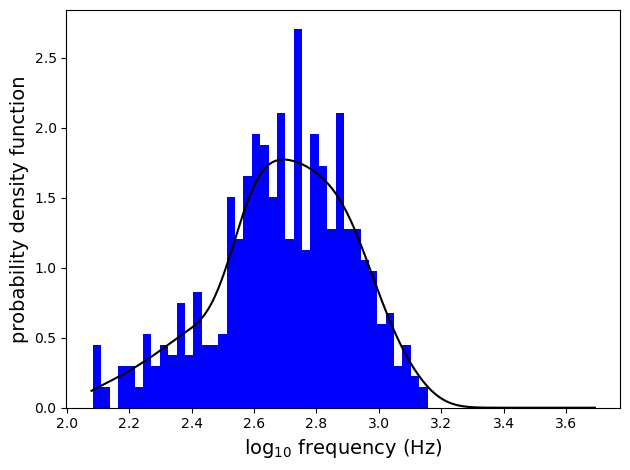

In [5]:
plt.hist(np.squeeze(log_f_dist),40,color="blue",density=True); 
plt.plot(np.log10(np.array(f_kde).transpose()),f_pdf,'k')#,'LineWidth',2);
plt.ylabel(r'probability density function',size=14)
plt.xlabel(r'$\log_{10}$ frequency (Hz)',size=14)
# plt.xlim([1e7,5e1])
plt.tight_layout() 
plt.savefig(savedir+'pdf_f_dist.png',format='png',dpi=400,facecolor='w')

In [56]:
fs_UL=np.array(fs_UL)
ellip_UL=np.array(ellip_UL)

In [ ]:
upper_limits={'frequencies': np.squeeze(fs_UL), 'ellipticities (95%)': np.squeeze(density_u)}
ellip_dist_kde_sdlim_DF=pd.DataFrame(ellip_dist_kde_sdlim)
ellip_dist_kde_sdlim_DF.to_csv('~/Downloads/ellip_dist_kde_sdlim.csv',index = False)

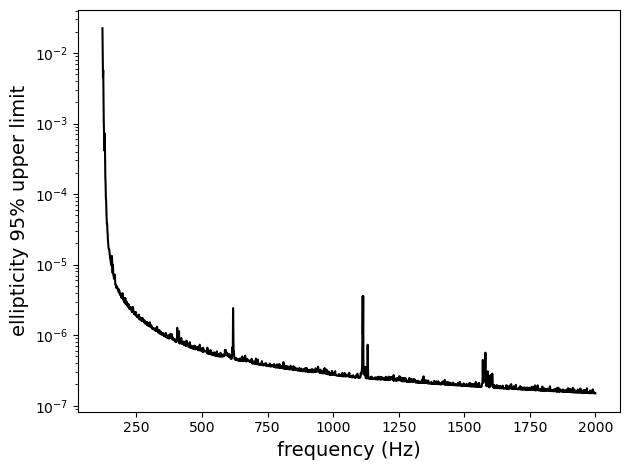

In [315]:
plt.semilogy(fs_UL,ellip_UL,'k')
plt.ylabel(r'ellipticity 95% upper limit',size=14)
plt.xlabel(r'frequency (Hz)',size=14)
plt.tight_layout()
plt.savefig(savedir+'allsky_ellip_UL.png',format='png',dpi=400,facecolor='w')

In [316]:
## figure 3, right


which_dist='atnf' # crustal strains distributed according to atnf ellipticity spindown limits
which_run='O3allsky'
dist_kpc=8.0
prop_factor=100.0 #doesn't matter
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.1

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag, sdlimfact, nargout=18)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


In [317]:
log_crust_dist=np.array(log_crust_dist)
xmesh_u=np.array(xmesh_u)
density_u=np.array(density_u)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)
np.max(Ngw)

13.413713323457463

In [318]:
sdlimfact

10.0

In [319]:
ff=np.array(ff)
num_detectable_MSPs=np.array(num_detectable_MSPs)
ee=np.array(ee)

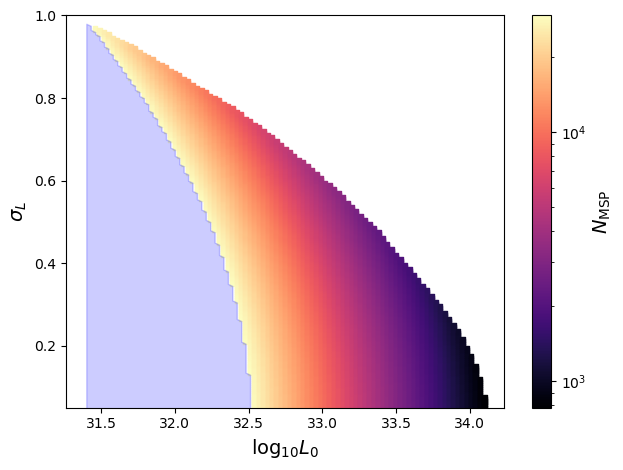

In [320]:
## figure 3, right


N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))


for i in range(len(sigmaLs_exc_unique)):
#     if i==len(L0s_exc_unique)-1:
#          maxsigmaL[i]=np.min(sigmaLs_exc[L0s_exc_unique[i]==L0s_exc])
#     else:
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
# plt.xscale('log')
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
# plt.axhline(y = np.max(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.axhline(y = np.min(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.plot(maxL0,sigmaLs_exc_unique,'-',markersize=1)
# ax1.fill_between(L0[Ngw>=N], sigmaL[Ngw>=N], (max_eps*1e-20)**2,color='cyan',label=r'BSD limits $\pm1\sigma$',zorder=2)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)
# plt.plot(L0[Ngw>=N], sigmaL[Ngw>=N],color='gray',linewidth=4)#,alpha=0.3,marker='s',s=40)#,marker='s',s=100,color='blue',alpha=0.1)

# plt.grid(True)
# plt.xlim([1e7,5e1])
plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_10perc_crustal_strain_model_exclusion_region_plot.png',format='png',dpi=400,facecolor='w')


In [173]:
# plt.scatter(ff[num_detectable_MSPs>=1],num_detectable_MSPs[num_detectable_MSPs>=1],c=ee[num_detectable_MSPs>=1],\
#             cmap='cmr.lavender',marker='.',s=2)#,norm=mpl.colors.LogNorm())
# plt.colorbar(label=r'ellipticity upper limit')
# plt.yscale('log')
# plt.ylabel(r'number of detectable MSPs',size=14)
# plt.xlabel(r'frequency (Hz)',size=14)
# # plt.xlim([1e7,5e1])
# plt.tight_layout()
# plt.savefig(savedir+'nmsp_vs_freq_ellip_crustal_strain_I_1e38.png',format='png',dpi=400,facecolor='w')


In [44]:
## figure 3, left

which_dist='atnf' # crustal strains distributed according to atnf ellipticity spindown limits
which_run='O3allsky'
dist_kpc=8.0
prop_factor=100.0 #doesn't matter
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.07## * 0.05

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag, sdlimfact, nargout=18)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


In [45]:
L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)
np.max(Ngw)

1.9606488785876355

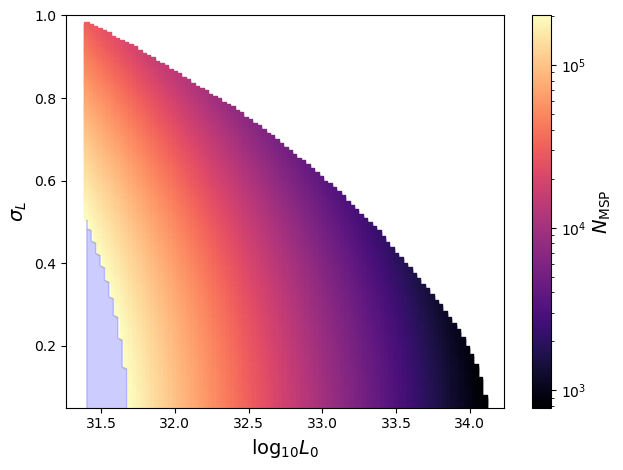

In [46]:
## figure 3, left


N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))


for i in range(len(sigmaLs_exc_unique)):
#     if i==len(L0s_exc_unique)-1:
#          maxsigmaL[i]=np.min(sigmaLs_exc[L0s_exc_unique[i]==L0s_exc])
#     else:
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
# plt.xscale('log')
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
# plt.axhline(y = np.max(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.axhline(y = np.min(sigmaLs_exc_unique), color = 'r', linestyle = '-')
# plt.plot(maxL0,sigmaLs_exc_unique,'-',markersize=1)
# ax1.fill_between(L0[Ngw>=N], sigmaL[Ngw>=N], (max_eps*1e-20)**2,color='cyan',label=r'BSD limits $\pm1\sigma$',zorder=2)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)
# plt.plot(L0[Ngw>=N], sigmaL[Ngw>=N],color='gray',linewidth=4)#,alpha=0.3,marker='s',s=40)#,marker='s',s=100,color='blue',alpha=0.1)

# plt.grid(True)
# plt.xlim([1e7,5e1])
plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_7perc_crustal_strain_model_exclusion_region_plot.png',format='png',dpi=400,facecolor='w')


In [12]:
[all_fs,all_Ps,ap,atnf_P,atnf_ap] = eng.calc_ap_P_for_isolated_search(nargout=5)

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.

tot_msps =

   514


n_msps_isolated =

   251


n_msps_binaries =

   263



In [47]:
all_fs=np.array(all_fs)
all_Ps=np.array(all_Ps)
ap=np.array(ap)
atnf_ap=np.array(atnf_ap)
atnf_P=np.array(atnf_P)
log_crust_dist = np.array(log_crust_dist)
xmesh_u = np.array(xmesh_u)

In [53]:
ellip_dist_kde_sdlim_DF

ellipticities           pdf
0       6.913741e-15  2.220446e-16
1       6.924375e-15  2.220446e-16
2       6.935025e-15  0.000000e+00
3       6.945692e-15  2.220446e-16
4       6.956375e-15  2.220446e-16
...              ...           ...
16379   5.919221e-04  2.220446e-16
16380   5.928326e-04  2.220446e-16
16381   5.937444e-04  0.000000e+00
16382   5.946576e-04  2.220446e-16
16383   5.955723e-04  2.220446e-16

[16384 rows x 2 columns]

In [55]:
ellip_dist_kde_sdlim={'ellipticities': np.squeeze(10**ellip_from_u), 'pdf': np.squeeze(density_u)}
ellip_dist_kde_sdlim_DF=pd.DataFrame(ellip_dist_kde_sdlim)
ellip_dist_kde_sdlim_DF.to_csv('~/Downloads/ellip_dist_kde_sdlim.csv',index = False)

In [ ]:
ellip_sdlim={'log10 ellipticity': np.squeeze(np.log10(10**log_crust_dist*1e-7/1e-2))}
ellip_sdlim_DF=pd.DataFrame(ellip_sdlim)
ellip_sdlim_DF.to_csv('~/Downloads/log10_ellip_sdlim.csv',index = False)

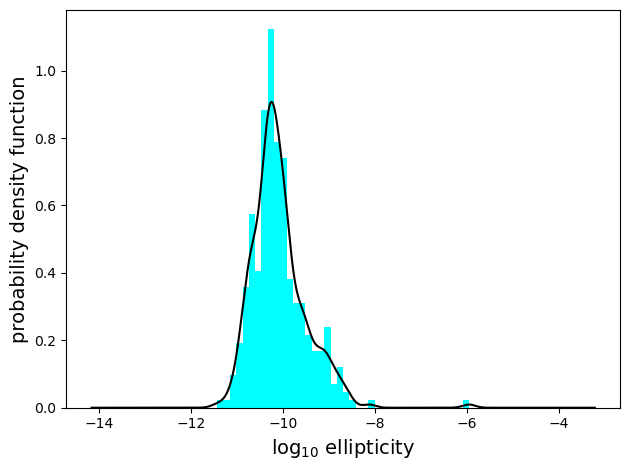

In [48]:
fig,ax1=plt.subplots()
plt.hist(np.squeeze(np.log10(10**log_crust_dist*1e-7/1e-2)),40,color="cyan",density=True);
ellip_from_u=np.log10(1e-7*(10**xmesh_u/1e-2))
plt.plot(ellip_from_u.transpose(),density_u,'k')#,'LineWidth',2);
plt.ylabel(r'probability density function',size=14)
plt.xlabel(r'$\log_{10}$ ellipticity',size=14)
# ax2 = ax1.twiny()
# ax2.plot(xmesh_u.transpose(), density_u, color='black',linewidth=0)
# ax2.set_xlabel(r'$\log_{10}$ crustal strain',size=14)
# plt.xlim([1e7,5e1])
plt.tight_layout() 
plt.savefig(savedir+'allsky_pdf_crust_strain_dist_atnf_sdlim_case_10perc.png',format='png',dpi=400,facecolor='w')

In [ ]:
# BSD_limits_data={'freqs': fs, 'eps2': (tru_eps*1e-20)**2,'eps2_-1sig':(min_eps*1e-20)**2,'eps2_+1sig':(max_eps*1e-20)**2,'improve_fact_eps2':factors_eps2}
# BSD_limits_DF=pd.DataFrame(BSD_limits_data)
# BSD_limits_DF.to_csv('./O3_bsd_dpdm_uls.csv',index = False)

In [327]:
sdlimfact

14.285714285714285

In [182]:
[Pgw_mag,Pgw_sds,magfacts,sdsfacts,Izzfacts]=eng.run_run_GeV_excess_calc_P_GW(nargout=5);

In [183]:
Pgw_mag=np.array(Pgw_mag)
Pgw_sds=np.array(Pgw_sds)
magfacts=np.array(magfacts)
sdsfacts=np.array(sdsfacts)
Izzfacts=np.array(Izzfacts)

In [184]:
Pgw_plots_mag, Pgw_plots_sds, Brat,the_Izz,the_sd_facts = eng.Gev_excess_Pgws_for_excl_plots(nargout=5);
Pgw_plots_mag=np.array(Pgw_plots_mag)
Pgw_plots_sds=np.array(Pgw_plots_sds)
Brat=np.array(Brat)
the_Izz=np.array(the_Izz)
the_sd_facts=np.array(the_sd_facts)

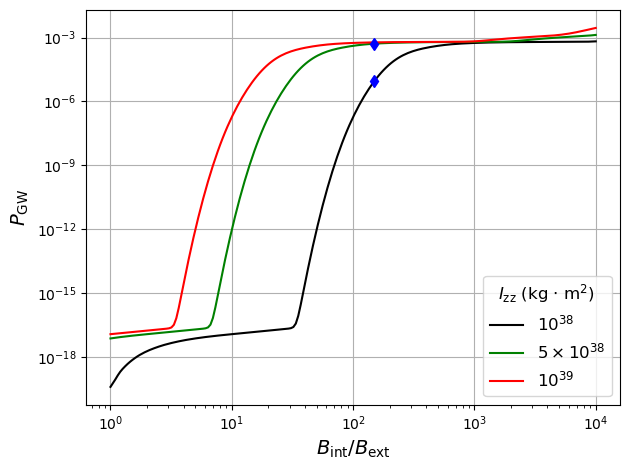

In [185]:
plt.loglog(magfacts.transpose(),Pgw_mag[:,0],'k',label=r'$10^{38}$')
plt.loglog(magfacts.transpose(),Pgw_mag[:,1],'g',label=r'$5\times 10^{38}$')
plt.loglog(magfacts.transpose(),Pgw_mag[:,2],'r',label=r'$10^{39}$')
plt.loglog(Brat,Pgw_plots_mag,'b',marker='d')

plt.ylabel(r'$P_{\rm GW}$',size=14)
plt.xlabel(r'$B_{\rm int}/B_{\rm ext}$',size=14)
plt.grid(True)
plt.legend(fontsize='large',title=r'$I_{\rm zz}$ (kg $\cdot$ m$^2$) ',title_fontsize='large')
plt.tight_layout()
# plt.ylim([1e-18,1])
plt.savefig(savedir+'allsky_Pgw_vs_mag_facts.png',format='png',dpi=400,facecolor='w')

In [186]:
Pgw_mag.shape

(200, 3)

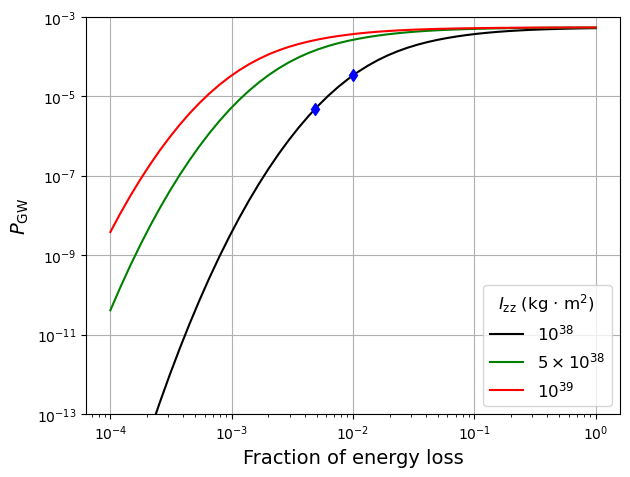

In [188]:
plt.loglog(1/sdsfacts.transpose()**2,Pgw_sds[:,0],'k',label=r'$10^{38}$')
plt.loglog(1/sdsfacts.transpose()**2,Pgw_sds[:,1],'g',label=r'$5\times 10^{38}$')
plt.loglog(1/sdsfacts.transpose()**2,Pgw_sds[:,2],'r',label=r'$10^{39}$')
plt.loglog(1/the_sd_facts**2,Pgw_plots_sds,'b',marker='d')
plt.ylabel(r'$P_{\rm GW}$',size=14)
plt.xlabel(r'Fraction of energy loss',size=14)
plt.grid(True)
plt.legend(fontsize='large',title=r'$I_{\rm zz}$ (kg $\cdot$ m$^2$) ',title_fontsize='large')
plt.tight_layout()
plt.ylim([1e-13,1e-3])

plt.savefig(savedir+'allsky_Pgw_vs_sds_facts.png',format='png',dpi=400,facecolor='w')

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


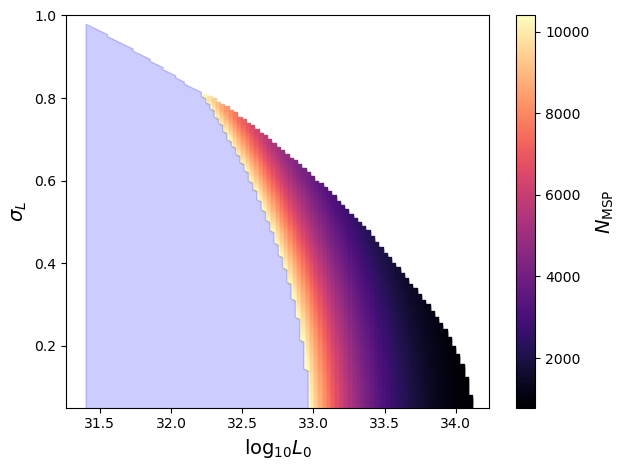

In [328]:
### this was only to produce different dist plots for atnf, at 10% spin-down limit
which_dist='atnf'
which_run='O3allsky'
dist_kpc=6.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.05

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag,sdlimfact, nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))
for i in range(len(sigmaLs_exc_unique)):
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10)
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)

plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_'+'10perc'+'_d_'+str(dist_kpc)+'kpc.png',format='png',dpi=400,facecolor='w')



Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


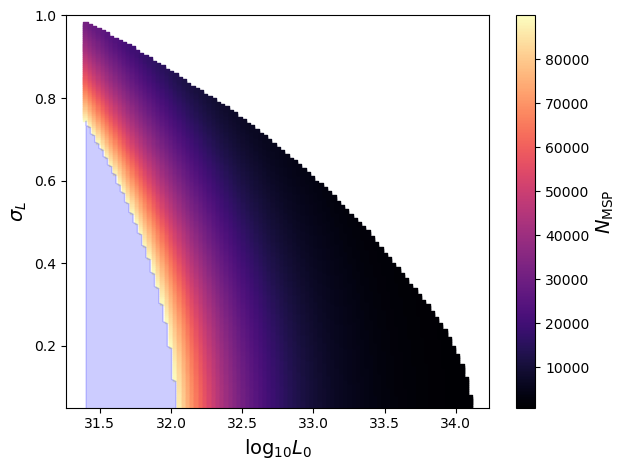

In [329]:
### this was only to produce different dist plots for atnf, at 10% spin-down limit
which_dist='atnf'
which_run='O3allsky'
dist_kpc=10.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.05

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag,sdlimfact, nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))
for i in range(len(sigmaLs_exc_unique)):
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10)
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'$\sigma_L$',size=14)
plt.xlabel(r'$\log_{10}L_0$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),1)

plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_'+'10perc'+'_d_'+str(dist_kpc)+'kpc.png',format='png',dpi=400,facecolor='w')



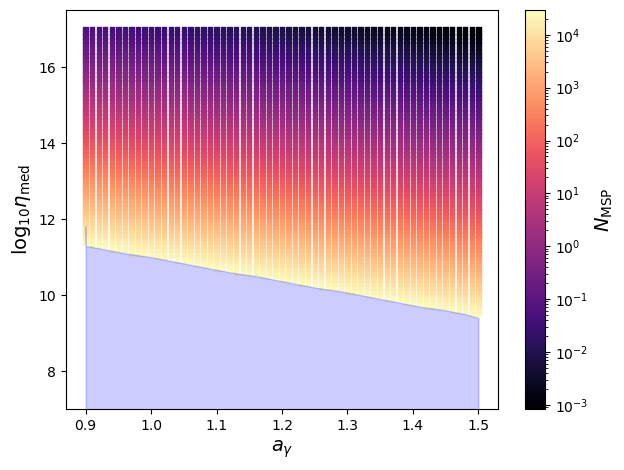

In [245]:
### a-gamma lum func, sd lim 10%
which_dist='atnf'
which_run='O3allsky'
dist_kpc=8.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.05
lum_func = 'a-gamma'

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag,sdlimfact,lum_func,nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))
for i in range(len(sigmaLs_exc_unique)):
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$a_\gamma$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique,11.8, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),17.5)

plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_'+'10perc'+'_lum_func_'+lum_func+'_.png',format='png',dpi=400,facecolor='w')



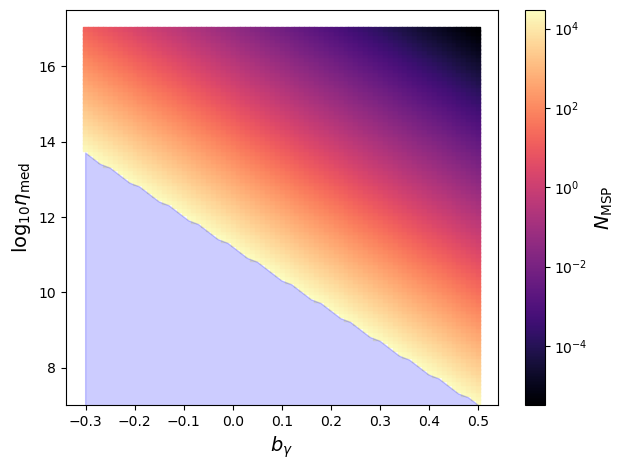

In [249]:
### b-gamma lum func, 10% sd lim
which_dist='atnf'
which_run='O3allsky'
dist_kpc=8.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.05
lum_func = 'b-gamma'

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag,sdlimfact,lum_func,nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))
for i in range(len(sigmaLs_exc_unique)):
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$b_\gamma$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),17.5)

plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_'+'10perc'+'_lum_func_'+lum_func+'_.png',format='png',dpi=400,facecolor='w')



In [ ]:
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$b_\gamma$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),17.5)

plt.tight_layout()

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


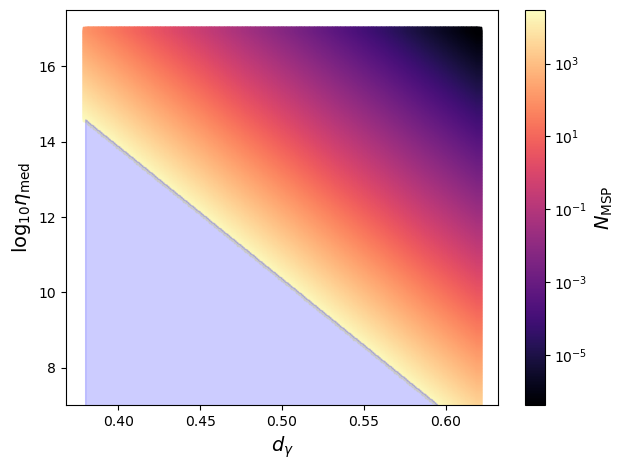

In [330]:
### d-gamma lum func, 10% sd lim
which_dist='atnf'
which_run='O3allsky'
dist_kpc=8.0
prop_factor=150.0
Izz=1.0e38
plot_flag=0
sdlimfact=1/0.1## * 0.05
lum_func = 'd-gamma'

[ff,num_detectable_MSPs,ee,\
    log_ellip_dist,ellip_kde,ellip_pdf,\
    log_f_dist,f_kde,f_pdf,\
    fs_UL,ellip_UL,\
    log_crust_dist,xmesh_u,density_u,L0,sigmaL,Nmsp,Ngw]\
    =eng.GeV_excess_constrain(which_dist,which_run,dist_kpc,prop_factor,Izz,plot_flag,sdlimfact,lum_func,nargout=18)

L0=np.array(L0)
sigmaL=np.array(sigmaL)
Nmsp=np.array(Nmsp)
Ngw=np.array(Ngw)

N=1
L0s_exc=(L0[Ngw>N])
L0s_exc_unique=np.unique(L0s_exc)
sigmaLs_exc=sigmaL[Ngw>N]
sigmaLs_exc_unique=np.unique(sigmaLs_exc)

maxL0=np.zeros(len(sigmaLs_exc_unique))
for i in range(len(sigmaLs_exc_unique)):
    maxL0[i]=np.max(L0s_exc[sigmaLs_exc_unique[i]==sigmaLs_exc])

fig=plt.figure()
ax1 = fig.add_subplot()  
plt.scatter(L0[Ngw<=N],sigmaL[Ngw<=N],c=Nmsp[Ngw<=N],\
            cmap='magma',marker='s',s=10,norm=mpl.colors.LogNorm())
cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
cbar.set_label(label=r'$N_{\rm MSP}$',size=14)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$d_\gamma$',size=14)
plt.fill_between(maxL0, sigmaLs_exc_unique, color='blue', alpha=0.2)
plt.ylim(np.min(sigmaLs_exc_unique),17.5)

plt.tight_layout()
plt.savefig(savedir+'allsky_sdlim_'+'10perc'+'_lum_func_'+lum_func+'_.png',format='png',dpi=400,facecolor='w')

